## Exploratory Data Analysis on Food and Nutrient Database for Dietary Studies


### The data set is taken from Food and Nutrient Databases for Dietry Studies
https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/fndds-download-databases/ <br>
Database : Nutrient Values for year 2017-2018

FNDDS is a database that provides the nutrient values for foods and beverages reported in What We Eat in America, the dietary intake component of the National Health and Nutrition Examination Survey.
Because FNDDS is used to generate the nutrient intake data files for What We Eat in America, NHANES, it is not required to estimate nutrient intakes from the survey. FNDDS is made available for researchers to review the nutrient profiles for specific foods and beverages as well as their associated portions and recipes. Such detailed information makes it possible for researchers to conduct enhanced analysis of dietary intakes. One example might be, looking across all breakfast cereals, what are the nutrient attributes of those most frequently consumed?

Feature description:
- WWEIA - What we Eat in America <br>
<br>
- Food Code <br>
An 8-digit number – food code – uniquely identifies each food or beverage item in FNDDS.
Food code numbers are generally assigned according to a classification scheme that associates
the first digit with one of nine major food commodity groups: Milk and Milk Products; Meat,
Poultry, Fish, and Mixtures; Eggs; Dry Beans, Peas, Other Legumes, Nuts, and Seeds; Grain
Products; Fruits; Vegetables; Fat, Oils, and Salad Dressings; Sugars, Sweets, Beverages <br>
<br>
-Main Description <br>
The main food description is the primary complete description identified by a unique 8-digit food
code and may include form, preparation method, and source of item. Main food descriptions
may be modified over time; however, if the food or beverage is determined to have changed
dramatically or no longer available, the food code may be discontinued.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#reading the csv file using pandas read_csv:
df = pd.read_csv("C:\\Users\\Anuja\\Data601\\FNDDS Nutrient Values.csv")
df.head(2)

,FNDDS Nutrient Values\n2017-2018 Food and Nutrient Database for Dietary Studies - At A Glance,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
0,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
1,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0,4.38,...,0.04,0,0.374,0.052,0,0.026,0,0,0,87.5


Looking at the header and dataframe, the first row contains the column names. Let's rearrange to give the dataframe proper header

In [3]:
#taking the first row of the dataframe which is at index 0
new_header = df.iloc[0]
#taking the dataframe from the second row which is from index 1 to last
df = df[1:]
#assigning the first row of the data frame to the columns of the dataframe
df.columns = new_header

In [4]:
df.head(3)

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
1,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0,4.38,...,0.04,0,0.374,0.052,0,0.026,0,0,0,87.5
2,11100000,"Milk, NFS",1004,"Milk, reduced fat",51,3.34,4.87,4.89,0,1.99,...,0.002,0,0.069,0.007,0,0.003,0,0.001,0,89.04
3,11111000,"Milk, whole",1002,"Milk, whole",60,3.28,4.67,4.81,0,3.2,...,0.004,0,0.115,0.012,0,0.004,0.001,0.002,0,88.1


In [5]:
print("Different type of values dataframe holds:")
df.dtypes.value_counts()

Different type of values dataframe holds:


object    69
dtype: int64

In [6]:
#checking the shape of the dataframe
print("Number of rows dataframe contains:", df.shape[0])
print("Number of columns dataframe contains:", df.shape[1])

Number of rows dataframe contains: 7083
Number of columns dataframe contains: 69


**Checking for duplicates**

In [7]:
df =df.drop_duplicates()
print("Shape of dataframe after dropping the duplicate columns:",df.shape)

Shape of dataframe after dropping the duplicate columns: (7083, 69)


We can see there are 69 features in the dataframe, let's examine them.

In [8]:
#converting the columns to a list to see all the column names
column_names = df.columns.to_list()
print("List of column names are given below:")
print(column_names)

List of column names are given below:
['Food code', 'Main food description', 'WWEIA Category number', 'WWEIA Category description', 'Energy (kcal)', 'Protein (g)', 'Carbohydrate (g)', 'Sugars, total\n(g)', 'Fiber, total dietary (g)', 'Total Fat (g)', 'Fatty acids, total saturated (g)', 'Fatty acids, total monounsaturated (g)', 'Fatty acids, total polyunsaturated (g)', 'Cholesterol (mg)', 'Retinol (mcg)', 'Vitamin A, RAE (mcg_RAE)', 'Carotene, alpha (mcg)', 'Carotene, beta (mcg)', 'Cryptoxanthin, beta (mcg)', 'Lycopene (mcg)', 'Lutein + zeaxanthin (mcg)', 'Thiamin (mg)', 'Riboflavin (mg)', 'Niacin (mg)', 'Vitamin B-6 (mg)', 'Folic acid (mcg)', 'Folate, food (mcg)', 'Folate, DFE (mcg_DFE)', 'Folate, total (mcg)', 'Choline, total (mg)', 'Vitamin B-12 (mcg)', 'Vitamin B-12, added\n(mcg)', 'Vitamin C (mg)', 'Vitamin D (D2 + D3) (mcg)', 'Vitamin E (alpha-tocopherol) (mg)', 'Vitamin E, added\n(mg)', 'Vitamin K (phylloquinone) (mcg)', 'Calcium (mg)', 'Phosphorus (mg)', 'Magnesium (mg)', 'Iron\

By looking at the column, column from 4:0\n(g) to 22:6 n-3\n(g) are of no use for my analysis. That's why I choose to drop these columns. Let's first clean '\n' from these columns and then I will remove them using their index.

In [9]:
clean_columns = []
for x in column_names:
    clean_columns.append(x.replace("\n", ""))
#print(clean_columns)

#assigning the clean columns to dataframe
df.columns = clean_columns

**Dropping unnecessary columns**

In [10]:
print("Shape of the dataframe before dropping the columns:", df.shape,'\n')
#printing the index of the columns 4:0(g) and 22:6 n-3(g) 
for i,j in enumerate(clean_columns):
    if j == '4:0(g)':
        print("Index of column " +str(j)+ ' is', i)
        
for i,j in enumerate(clean_columns):
    if j == '22:6 n-3(g)':
        print("Index of column " +str(j)+ ' is', i)
        
#We have to drop columns from index 49 to index 68 (exclusive)
#creating a new dataframe contaning the columns to be dropped:
dropping_columns = df.iloc[:, 49:68]

#dropping the columns and storing in a new dataframe
df2 = df.drop(dropping_columns, axis = 1) 
#print(df2.columns)

print("\nShape of the dataframe after dropping the columns:",df2.shape)

Shape of the dataframe before dropping the columns: (7083, 69) 

Index of column 4:0(g) is 49
Index of column 22:6 n-3(g) is 67

Shape of the dataframe after dropping the columns: (7083, 50)


Changing the type of columns containing numbers which are object in the dataframe

In [11]:
#print(df2.columns.to_list())

print("Datatypes of dataframe is",df.dtypes.value_counts())
#only two columns in the dataframe were objects rest everything is numerical
list_numeric_columns = ['Food code','WWEIA Category number','Energy (kcal)', 'Protein (g)', 'Carbohydrate (g)', 
                        'Sugars, total(g)', 'Fiber, total dietary (g)', 'Total Fat (g)', 
                        'Fatty acids, total saturated (g)', 'Fatty acids, total monounsaturated (g)',
                        'Fatty acids, total polyunsaturated (g)', 'Cholesterol (mg)', 'Retinol (mcg)', 
                        'Vitamin A, RAE (mcg_RAE)', 'Carotene, alpha (mcg)', 'Carotene, beta (mcg)', 
                        'Cryptoxanthin, beta (mcg)', 'Lycopene (mcg)', 'Lutein + zeaxanthin (mcg)', 
                        'Thiamin (mg)', 'Riboflavin (mg)', 'Niacin (mg)', 'Vitamin B-6 (mg)', 'Folic acid (mcg)', 
                        'Folate, food (mcg)', 'Folate, DFE (mcg_DFE)', 'Folate, total (mcg)', 'Choline, total (mg)', 
                        'Vitamin B-12 (mcg)', 'Vitamin B-12, added(mcg)', 'Vitamin C (mg)', 'Vitamin D (D2 + D3) (mcg)', 
                        'Vitamin E (alpha-tocopherol) (mg)', 'Vitamin E, added(mg)', 'Vitamin K (phylloquinone) (mcg)', 
                        'Calcium (mg)', 'Phosphorus (mg)', 'Magnesium (mg)', 'Iron(mg)', 'Zinc(mg)', 'Copper (mg)', 
                        'Selenium (mcg)', 'Potassium (mg)', 'Sodium (mg)', 'Caffeine (mg)', 'Theobromine (mg)', 'Alcohol (g)', 'Water(g)']

df2[list_numeric_columns] = df2[list_numeric_columns].apply(pd.to_numeric, errors = 'coerce', axis= 1)
print("Datatype count after changing:")
print(df2.dtypes.value_counts())

Datatypes of dataframe is object    69
dtype: int64
Datatype count after changing:
float64    48
object      2
dtype: int64


In [12]:
#changing the "WWEIA Category Description" to a category column
df2['WWEIA Category description'] = df['WWEIA Category description'].astype('category')
print("Datatype count after changing:")
print(df2.dtypes.value_counts())

Datatype count after changing:
float64     48
object       1
category     1
dtype: int64


**Checking for unique entries in the columns:**

In [13]:
def unique_col(df,count):
    for this_column in df.columns:
        print("\n===",this_column,'has',df[this_column].nunique(),"unique entries")
        print(df[this_column].value_counts().head(count))
        
unique_col(df2,5)


=== Food code has 7083 unique entries
92308050.0    1
32130140.0    1
58131600.0    1
58162140.0    1
92305910.0    1
Name: Food code, dtype: int64

=== Main food description has 7083 unique entries
Refried beans with meat                     1
Potato, french fries, from frozen, fried    1
Chitterlings, cooked                        1
Potato chips, reduced fat, unsalted         1
Armadillo, cooked                           1
Name: Main food description, dtype: int64

=== WWEIA Category number has 167 unique entries
2402.0    340
3002.0    299
3802.0    228
5502.0    186
3204.0    182
Name: WWEIA Category number, dtype: int64

=== WWEIA Category description has 167 unique entries
Fish                                                340
Meat mixed dishes                                   299
Soups                                               228
Cakes and pies                                      186
Pasta mixed dishes, excludes macaroni and cheese    182
Name: WWEIA Category descriptio

**Checking the sum of zeros in the every column**

In [14]:
for col in df2.columns:
    column = df2[col]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', col, ' is : ', count)

Count of zeros in column  Food code  is :  0
Count of zeros in column  Main food description  is :  0
Count of zeros in column  WWEIA Category number  is :  0
Count of zeros in column  WWEIA Category description  is :  0
Count of zeros in column  Energy (kcal)  is :  28
Count of zeros in column  Protein (g)  is :  202
Count of zeros in column  Carbohydrate (g)  is :  430
Count of zeros in column  Sugars, total(g)  is :  663
Count of zeros in column  Fiber, total dietary (g)  is :  1642
Count of zeros in column  Total Fat (g)  is :  228
Count of zeros in column  Fatty acids, total saturated (g)  is :  322
Count of zeros in column  Fatty acids, total monounsaturated (g)  is :  336
Count of zeros in column  Fatty acids, total polyunsaturated (g)  is :  300
Count of zeros in column  Cholesterol (mg)  is :  2443
Count of zeros in column  Retinol (mcg)  is :  2650
Count of zeros in column  Vitamin A, RAE (mcg_RAE)  is :  1411
Count of zeros in column  Carotene, alpha (mcg)  is :  5180
Count 

Columns like, Caffeine, Theobromine ,Alcohol etc contains zero upto 85%. <br>
It does not mean we have to drop them. It hold significane to the data. For instance, if you want to know the alcohol content of a specific food categroy. 

**Null Values**

In [15]:
empty_columns = []

for col in df2.columns:
    if df2[col].isnull().all():
        empty_columns.append(col)
        
print(" List of empty columns are:")
display(empty_columns)

 List of empty columns are:


[]

There are no empty values in the columns.<br> Fortunately, in our data there are no missing values.

In [107]:
plt.style.use('ggplot')

<Figure size 288x288 with 0 Axes>

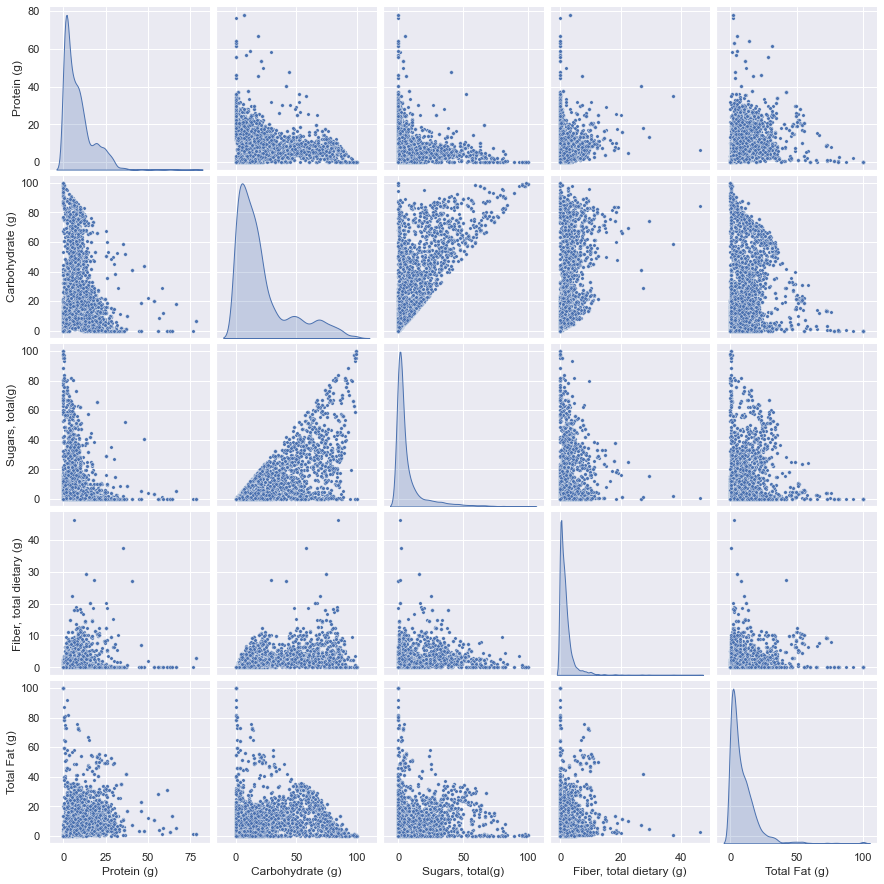

In [124]:
nb_sample=10000
#marker_size=nb_sample*5/10000
ds=df2.sample(10000, replace = True)
sns.set(font_scale=1)
plt.figure(figsize=(4, 4))

sns.pairplot(ds.loc[:,['Protein (g)',
       'Carbohydrate (g)', 'Sugars, total(g)', 'Fiber, total dietary (g)',
       'Total Fat (g)' ]], 
             diag_kind='kde',
             height=2.5,
             plot_kws = {'s': 12},
             palette=legend)
plt.show()

**checking the disrtibution of Energy column**

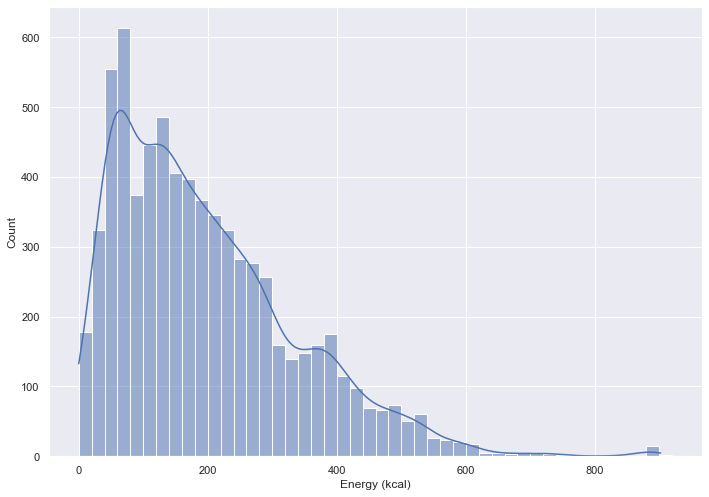

In [120]:
hist_ = sns.histplot(data=df2, x="Energy (kcal)", binwidth=20, kde = True)
sns.set(rc={'figure.figsize':(20,15)})

**Let's see the different kind of words in the dataset**


In [16]:
from collections import Counter
from wordcloud import WordCloud

In [17]:
def wordclouding(data, label='product_name', sep=' '):
    """To return a wordcloud present in the column 'label', the separation of the word is the argument 'sep' '"""
    words = []
    
    for string in data[label]:
        listwords= str(string).split(sep)
        for w in listwords:
            if (w!=' ')and (w!='nan'):
                words.append(w)
    count=Counter(words)
        

    wordcloud = WordCloud(width=1080, height=920, colormap='PuBuGn').fit_words(count)
    plt.figure(figsize=(25,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.show()

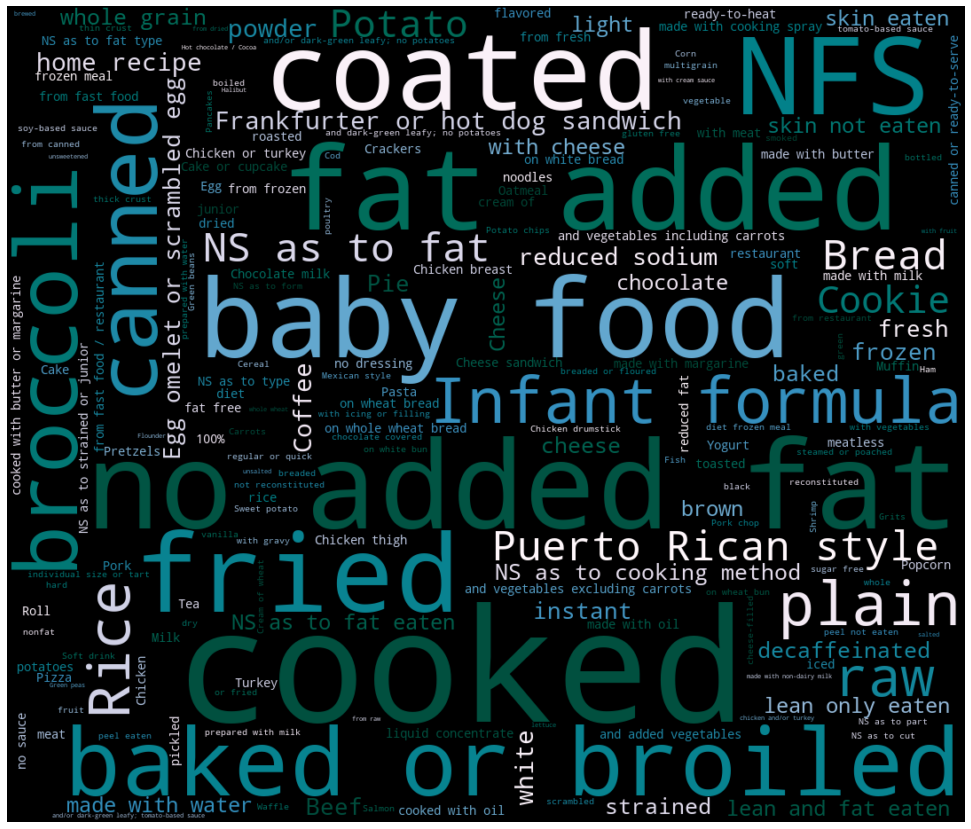

In [18]:
wordclouding(df2, label='Main food description', sep=',')

Does not give much information about the categories of food in the dataset. Trying column WWEIA Category description to explore the different names.

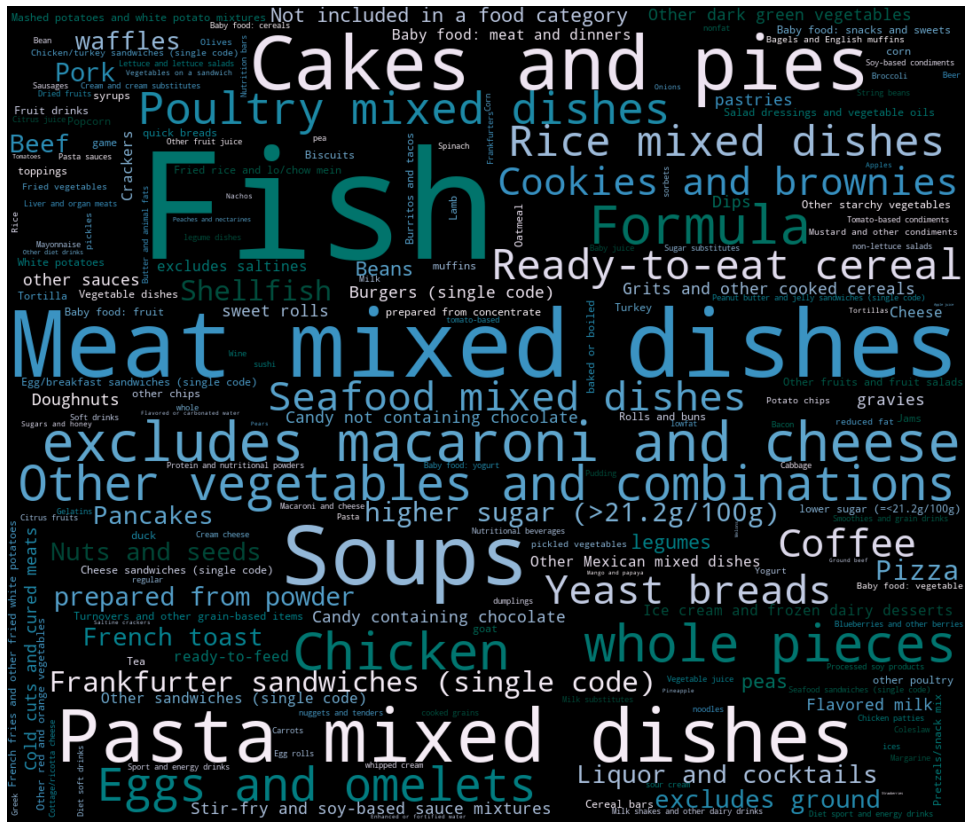

In [19]:
wordclouding(df2, label='WWEIA Category description', sep=',')

**Creating a dataframe for all macro nutrients that are protein, carbohydrate, fibers and fats.**

In [20]:
df_macro = df2[['Main food description', 
       'WWEIA Category description', 'Energy (kcal)', 'Protein (g)',
       'Carbohydrate (g)','Fiber, total dietary (g)',
       'Total Fat (g)','Fatty acids, total saturated (g)',
       'Fatty acids, total monounsaturated (g)',
       'Fatty acids, total polyunsaturated (g)']]

**Creating a dataframe for micro nutrients**

In [22]:
df_micro = df2[['WWEIA Category description','Vitamin A, RAE (mcg_RAE)', 'Vitamin B-6 (mg)', 'Folic acid (mcg)',
      'Vitamin B-12 (mcg)', 'Vitamin B-12, added(mcg)',
       'Vitamin C (mg)', 'Vitamin D (D2 + D3) (mcg)',
       'Vitamin E (alpha-tocopherol) (mg)', 'Vitamin E, added(mg)',
       'Vitamin K (phylloquinone) (mcg)', 'Calcium (mg)', 'Phosphorus (mg)',
       'Magnesium (mg)', 'Iron(mg)', 'Zinc(mg)', 'Copper (mg)',
       'Selenium (mcg)', 'Potassium (mg)', 'Sodium (mg)', 'Caffeine (mg)',
       'Theobromine (mg)']]

In [61]:
def macro_micro_contents(category_name):
    df_macro_groupby = df_macro.groupby("WWEIA Category description").agg("mean")
    df_macro_groupby.loc[category_name].plot(kind = 'barh')
    plt.title("Average Macro Nutrients in "+ category_name, fontsize = 15)
    plt.xlim(0,350)
    plt.legend()
    plt.show()
    
    df_micro_grouped = df_micro.groupby("WWEIA Category description").agg("mean")
    df_micro_grouped.loc[category_name].plot(kind = 'barh', color = 'Green')
    plt.title("Average Micro Nutrients in " + category_name ,fontsize = 15)
    plt.xlim(0,1000)
    plt.legend()
    plt.show()
    

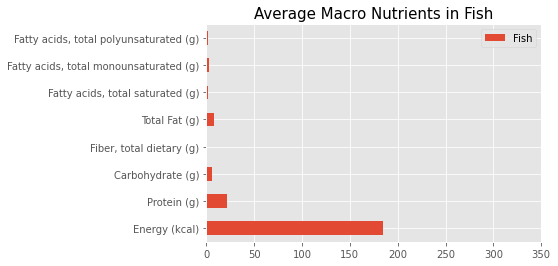

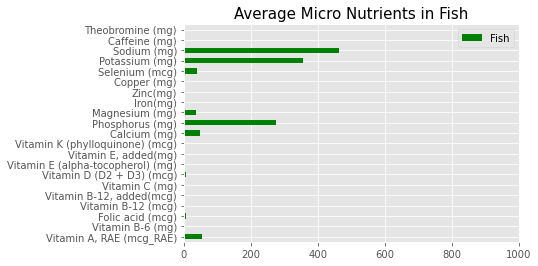

In [62]:
macro_micro_contents("Fish")

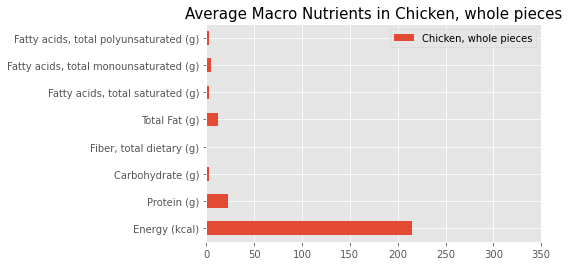

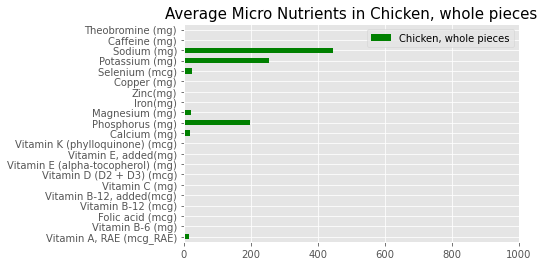

In [63]:
macro_micro_contents("Chicken, whole pieces")

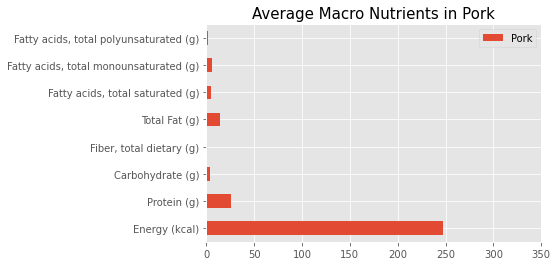

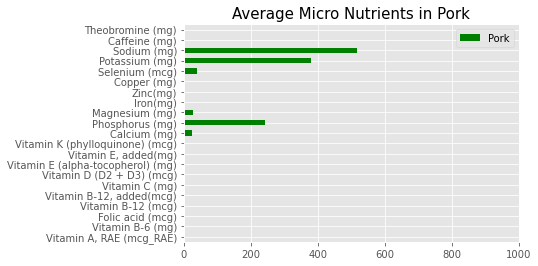

In [64]:
macro_micro_contents("Pork")

For different categories of food, we can get the information about the Macro nutrients and Micro nutrients. Like, average content of Protein in a particular category type. What is the contribution of Sodium in each category? What's the average amount of fat in a category Etc.

**Influence of Macro Nutrients on Energy**

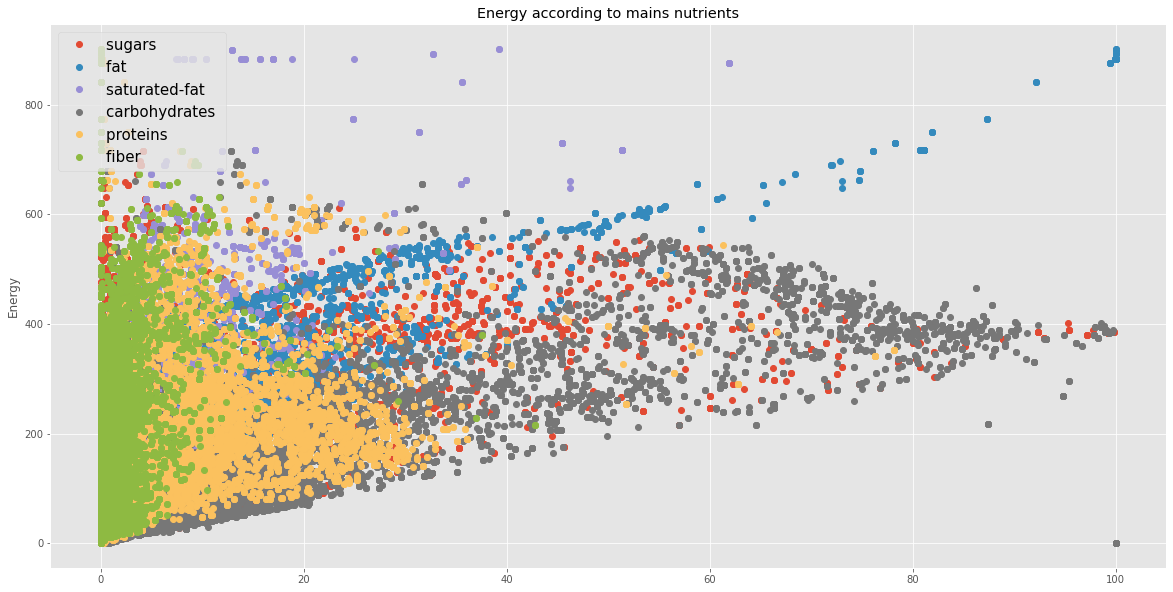

In [31]:
ds=df2.sample(15000, replace = True)
x = pd.DataFrame(ds['Energy (kcal)'], columns=['Energy (kcal)'])
fig=plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.title('Energy according to mains nutrients' )

plt.plot(ds['Sugars, total(g)'], x, 'o', label='sugars ')
plt.plot(ds['Total Fat (g)'], x, 'o', label='fat ')
plt.plot(ds['Fatty acids, total saturated (g)'], x, 'o', label='saturated-fat ')
plt.plot(ds['Carbohydrate (g)'], x, 'o', label='carbohydrates ')
plt.plot(ds['Protein (g)'], x, 'o', label='proteins ')
plt.plot(ds['Fiber, total dietary (g)'], x, 'o', label='fiber ')
plt.ylabel('Energy')


plt.legend(loc='upper left', prop={'size':15})

It is evident from the graph, <br>
- protein content rarely exceeds 40% of the total energy
- Fiber content has very less contribution in the total energy (not exceeding more then 20%)
- Most of the Energy is consituted from carbohydrates (including sugar and proteins)

**Exploring food category based on filters**

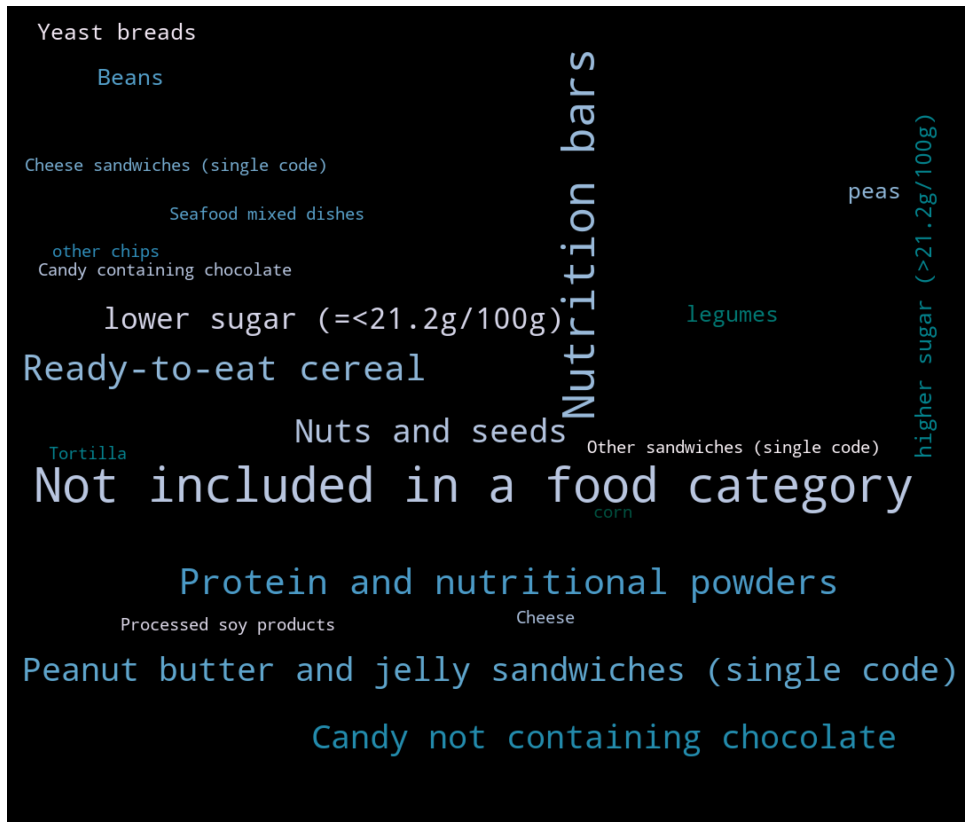

(60, 50)

In [65]:
d_a = df2[(df2['Carbohydrate (g)']>30)&(df2['Protein (g)']>15)]
wordclouding(d_a, label='WWEIA Category description', sep=',')
d_a.shape